In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/quora-df/quora_feautures.csv')

In [6]:
df['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [6]:
df = df.dropna()

In [5]:
df.shape

(404287, 29)

In [11]:
test_data = pd.read_csv("/kaggle/input/test-data-adv/test_adv_feature.csv")

# Preprocess

In [10]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

# Creating New Features

In [11]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [12]:
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()

In [13]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7


In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [16]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4


In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [18]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1,22
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21


In [19]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1,22,0.05
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21,0.19


In [20]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [21]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [22]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,21,0.19,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


In [23]:
pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=765a3545802c5f7d5e21f8db7d739a92ff502493e96dca0ce71c026abc2189fd
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance
Note: you may need to restart the kernel to use updated packages.


In [25]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0] * 3  # Initialize features to default values
    
    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features  # Return default values if either question is empty
    
    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Longest Common Substring Ratio
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:  # Check if strs is non-empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0  # Default value if no common substring
    
    return length_features


In [26]:
# Apply the function
length_features = df.apply(fetch_length_features, axis=1)

# Create new columns
df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [27]:
df.shape

(404287, 24)

In [28]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio'],
      dtype='object')

In [29]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [30]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer()
q1_tfidf = vectorizer.fit_transform(df['question1'])
q2_tfidf = vectorizer.transform(df['question2'])

# Compute cosine similarity
#df['similarity'] = [cosine_similarity(q1_tfidf[i], q2_tfidf[i])[0][0] for i in range(len(df))]

In [32]:
df['similarity'] = [
    cosine_similarity(q1_tfidf[i].reshape(1, -1), q2_tfidf[i].reshape(1, -1))[0][0]
    for i in range(len(df))
]

In [35]:
df.shape

(404287, 29)

In [36]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained GloVe word vectors (50D for faster computation)
glove_model = api.load("glove-wiki-gigaword-50")  # You can change to 100D, 200D, etc.

# Function to get sentence embedding by averaging word embeddings
def get_sentence_embedding(sentence):
    words = sentence.split()  # Tokenize sentence
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    
    if len(word_vectors) == 0:  # If no word embeddings are found, return a zero vector
        return np.zeros(50)
    
    return np.mean(word_vectors, axis=0)  # Average word embeddings

# Compute sentence embeddings
q1_embeddings = np.array([get_sentence_embedding(q) for q in df['question1']])
q2_embeddings = np.array([get_sentence_embedding(q) for q in df['question2']])


In [37]:
df['embedding_similarity'] = [
    cosine_similarity(q1_embeddings[i].reshape(1, -1), q2_embeddings[i].reshape(1, -1))[0][0]
    for i in range(len(df))
]

In [3]:
df = pd.read_csv('/kaggle/input/quora-df/quora_feautures.csv')

In [4]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,...,0.466664,0.0,1.0,5.0,12.5,0.588235,66,74,63,86
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,...,0.000000,0.0,0.0,1.0,11.5,0.040000,9,11,25,28
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,...,0.307690,0.0,1.0,6.0,10.0,0.153846,35,55,47,67


In [5]:
df.shape

(404287, 29)

In [39]:
df.shape

(404287, 30)

In [6]:
df.isnull().sum()

Unnamed: 0               0
id                       0
qid1                     0
qid2                     0
question1               15
question2                9
is_duplicate             0
q1_len                   0
q2_len                   0
q1_num_words             0
q2_num_words             0
word_common              0
word_total               0
word_share               0
cwc_min                  0
cwc_max                  0
csc_min                  0
csc_max                  0
ctc_min                  0
ctc_max                  0
last_word_eq             0
first_word_eq            0
abs_len_diff             0
mean_len                 0
longest_substr_ratio     0
fuzz_ratio               0
fuzz_partial_ratio       0
token_sort_ratio         0
token_set_ratio          0
dtype: int64

In [7]:
df = df.dropna()

# CountVector

In [ ]:
question = list(df['question1']) + list(df['question2'])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=45000,  oov_token="<OOV>")


In [18]:
tokenizer.fit_on_texts(question)

In [19]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'what': 3,
 'is': 4,
 'i': 5,
 'how': 6,
 'a': 7,
 'to': 8,
 'in': 9,
 'do': 10,
 'of': 11,
 'are': 12,
 'and': 13,
 'can': 14,
 'for': 15,
 'you': 16,
 'why': 17,
 'it': 18,
 'my': 19,
 'best': 20,
 'on': 21,
 'does': 22,
 'have': 23,
 'or': 24,
 'which': 25,
 'be': 26,
 'if': 27,
 'not': 28,
 'some': 29,
 'that': 30,
 'with': 31,
 'get': 32,
 'should': 33,
 'an': 34,
 'from': 35,
 'your': 36,
 's': 37,
 'india': 38,
 'will': 39,
 'people': 40,
 'when': 41,
 'who': 42,
 'at': 43,
 'like': 44,
 'good': 45,
 'would': 46,
 'there': 47,
 'as': 48,
 'about': 49,
 'between': 50,
 'one': 51,
 'did': 52,
 'most': 53,
 'am': 54,
 'we': 55,
 'quora': 56,
 'make': 57,
 'way': 58,
 'where': 59,
 'by': 60,
 'any': 61,
 'was': 62,
 'me': 63,
 'life': 64,
 'so': 65,
 'they': 66,
 'after': 67,
 'time': 68,
 'this': 69,
 'money': 70,
 'know': 71,
 'has': 72,
 'difference': 73,
 'learn': 74,
 'new': 75,
 'use': 76,
 'much': 77,
 'someone': 78,
 'their': 79,
 'think': 80,
 'many

In [20]:
q1_seq = tokenizer.texts_to_sequences(df['question1'])

In [21]:
q2_seq = tokenizer.texts_to_sequences(df['question2'])

# Padding

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
len_of_seq = [len(x) for x in  q2_seq]

In [24]:
max(len_of_seq)

248

In [25]:
sequence = tokenizer.texts_to_sequences(question)

In [26]:
sequence

[[3, 4, 2, 1219, 60, 1219, 2565, 8, 578, 9, 757, 381, 9, 38],
 [3, 4, 2, 550, 11, 14141, 13452, 5, 20956, 4488],
 [6, 14, 5, 218, 2, 439, 11, 19, 361, 1812, 200, 145, 7, 2764],
 [17, 54, 5, 2765, 309, 2746, 6, 14, 5, 648, 18],
 [25, 51, 7062, 9, 230, 34338, 1887, 2033, 10484, 13, 1917, 10831, 6416],
 [2363,
  5,
  54,
  7,
  9844,
  919,
  4418,
  804,
  13,
  4418,
  5003,
  3,
  22,
  30,
  238,
  49,
  63],
 [33, 5, 126, 30403],
 [6, 14, 5, 26, 7, 45, 25353],
 [41, 10, 16, 76, 1, 481, 11, 1],
 [6658, 179, 14, 5, 447, 19, 7755, 1, 1],
 [954, 8, 89, 4620, 11, 30404, 145, 30405, 1],
 [6, 10, 5, 224, 13, 89, 19, 286, 1716],
 [3, 14, 57, 605, 630, 8, 74],
 [3, 62, 36, 96, 1393, 297, 44],
 [3,
  12,
  2,
  888,
  8,
  180,
  36,
  1156,
  35,
  7,
  234,
  518,
  8,
  7,
  651,
  231,
  9,
  2,
  106,
  6,
  10,
  66,
  168,
  8,
  2,
  2279,
  888,
  9,
  515],
 [3, 46, 7, 85, 1132, 102, 15, 477, 497, 832, 37, 287, 21, 34, 3481, 518],
 [3, 22, 11418, 102],
 [17, 10, 302, 101, 8, 26, 277,

In [27]:
q1_padded = pad_sequences(q1_seq, maxlen=248, padding='post', truncating='post')
q2_padded = pad_sequences(q2_seq, maxlen=248, padding='post', truncating='post')

In [28]:
q1_padded.shape

(404264, 248)

In [54]:
df_cor = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis=1)

In [58]:
cor = df_cor.corr()

<Axes: >

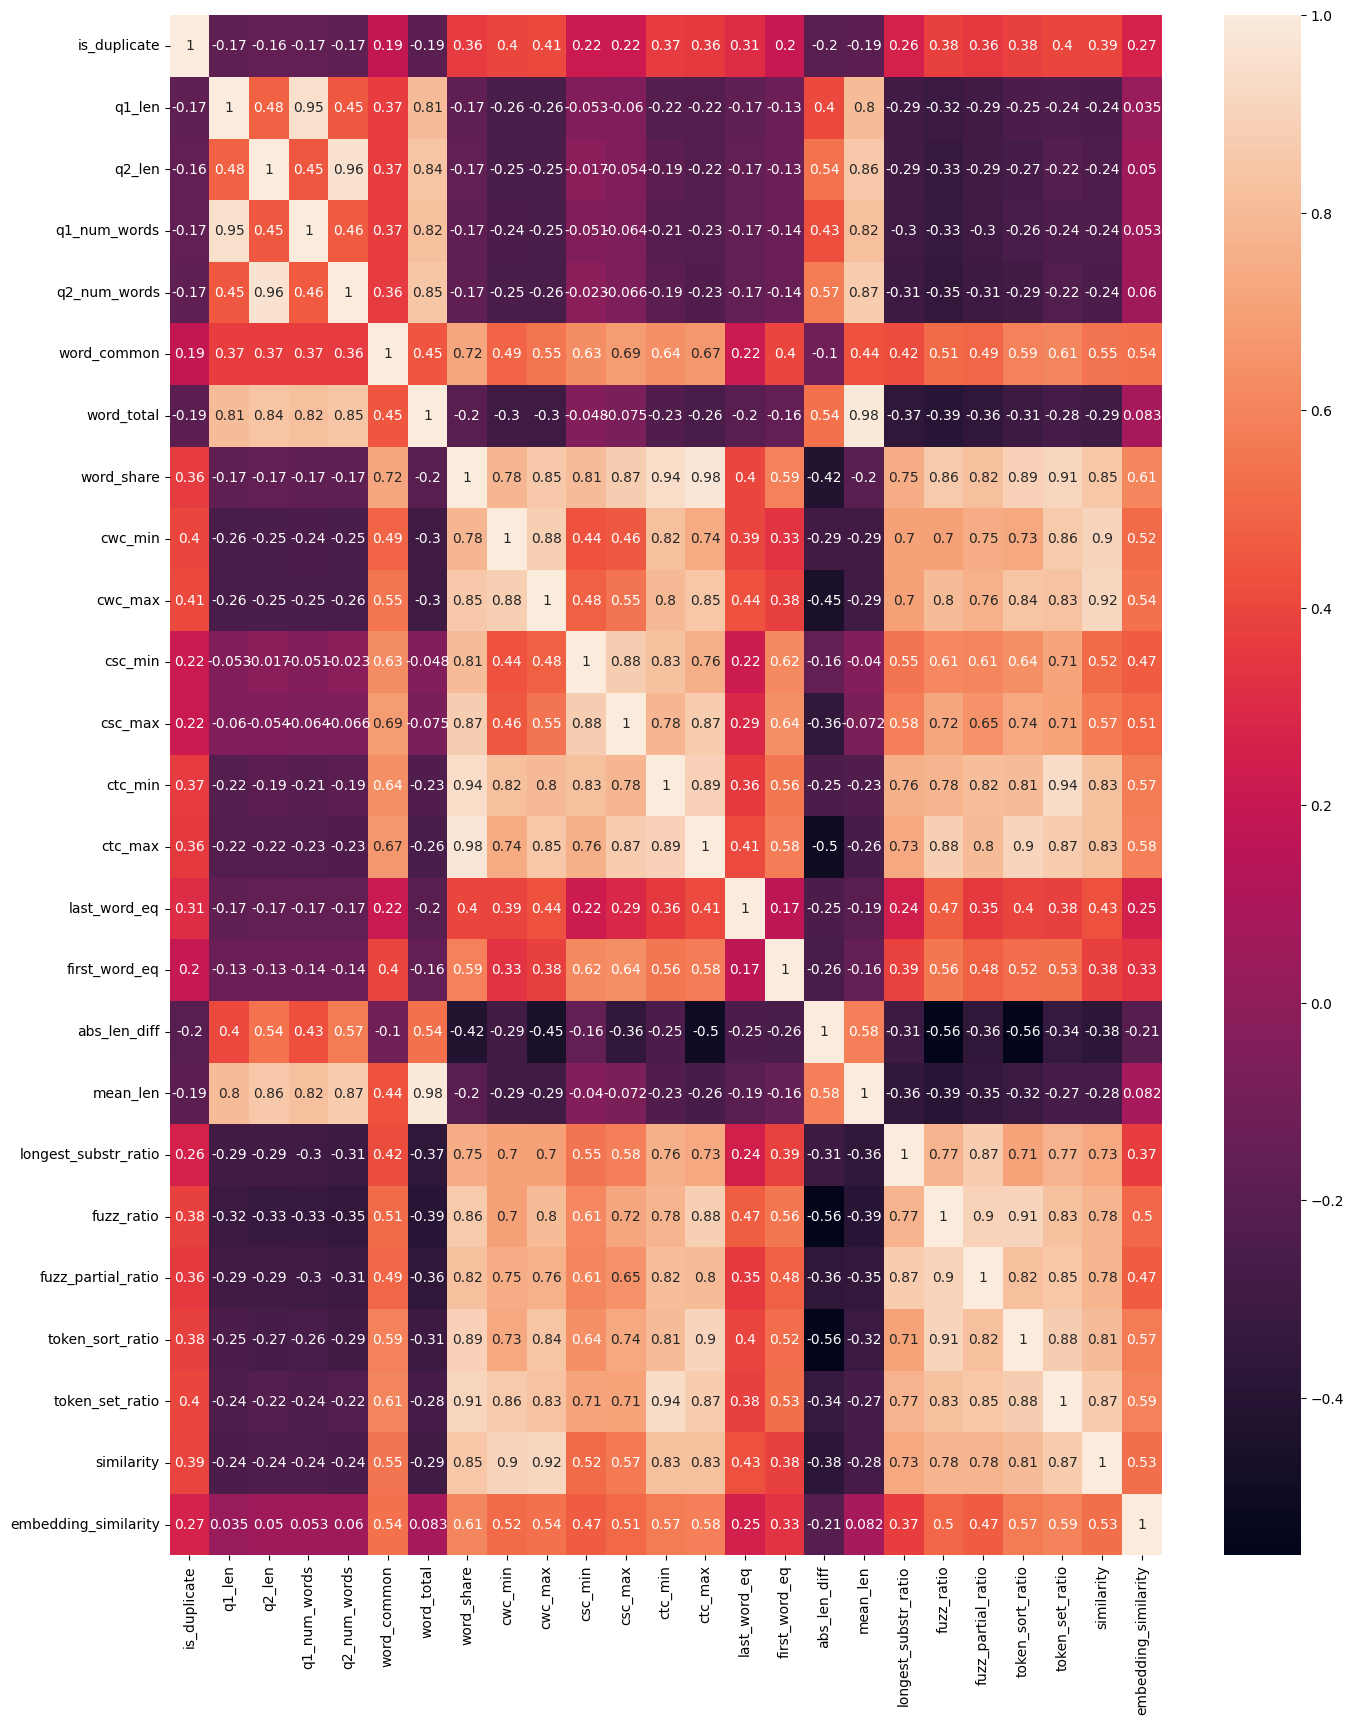

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,20))
sns.heatmap(cor, annot=True)

In [4]:
df = pd.read_csv('/kaggle/input/quora-df/quora_feautures.csv')

In [5]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,...,0.466664,0.0,1.0,5.0,12.5,0.588235,66,74,63,86
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,...,0.000000,0.0,0.0,1.0,11.5,0.040000,9,11,25,28
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,...,0.307690,0.0,1.0,6.0,10.0,0.153846,35,55,47,67


In [7]:
df.isnull().sum()

Unnamed: 0              0
id                      0
qid1                    0
qid2                    0
question1               0
question2               0
is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [6]:
df = df.dropna()

# Creating Training Data

In [29]:
new_train_data = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'Unnamed: 0'], axis=1)

In [30]:
new_train_data.columns

Index(['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [31]:
new_train_data_arr = np.array(new_train_data)

In [32]:
new_train_data_arr.shape

(404264, 22)

In [33]:
q1_padded.shape[1]

248

In [34]:
y = df['is_duplicate']

In [35]:
y = np.array(y, dtype=np.float32)

In [36]:
q1_padded = np.array(q1_padded, dtype=np.int32)
q2_padded = np.array(q2_padded, dtype=np.int32)

# Ensure `train_data_arr` is also a NumPy array
train_data_arr = np.array(new_train_data_arr, dtype=np.float32)

In [37]:
print(q1_padded.shape)
print(new_train_data_arr.shape)

(404264, 248)
(404264, 22)


In [38]:
train_data = np.hstack([q1_padded, q2_padded, train_data_arr])

In [52]:
train_data.shape

(404264, 518)

In [40]:
train_data

array([[  3.,   4.,   2., ..., 100.,  93., 100.],
       [  3.,   4.,   2., ...,  74.,  63.,  86.],
       [  6.,  14.,   5., ...,  46.,  63.,  63.],
       ...,
       [  3.,   4.,  51., ...,  75.,  79.,  86.],
       [  3.,   4.,   2., ...,  34.,  35.,  37.],
       [  3.,   4.,  44., ...,  89.,  90., 100.]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
y_train.shape

(323411,)

In [45]:
X_train.shape

(323411, 518)

# Model Training

In [46]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate,  Dropout
from tensorflow.keras.models import Sequential

In [47]:
max_len = 248  # Since you padded both q1 & q2 to 248
vocab_size = 35000  # Adjust based on your tokenizer's vocab size
embedding_dim = 300  # Use pre-trained embeddings like GloVe for better performance

In [53]:
model = Sequential()

model.add(Embedding(input_dim=35000, output_dim=128, input_length=248))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005) 

In [55]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7, batch_size=64)

Epoch 1/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 249s 49ms/step - accuracy: 0.6880 - loss: 0.5364 - val_accuracy: 0.7279 - val_loss: 0.4985
Epoch 2/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 245s 49ms/step - accuracy: 0.7282 - loss: 0.4973 - val_accuracy: 0.7382 - val_loss: 0.4858
Epoch 3/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 246s 49ms/step - accuracy: 0.7380 - loss: 0.4871 - val_accuracy: 0.7402 - val_loss: 0.4803
Epoch 4/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 246s 49ms/step - accuracy: 0.7421 - loss: 0.4811 - val_accuracy: 0.7412 - val_loss: 0.4778
Epoch 5/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 246s 49ms/step - accuracy: 0.7438 - loss: 0.4766 - val_accuracy: 0.7440 - val_loss: 0.4755
Epoch 6/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 246s 49ms/step - accuracy: 0.7460 - loss: 0.4736 - val_accuracy: 0.7450 - val_loss: 0.4741
Epoch 7/7
5054/5054 ━━━━━━━━━━━━━━━━━━━━ 246s 49ms/step - accuracy: 0.7490 - loss: 0.4703 - val_accuracy: 0.7464 - val_loss: 0.4732


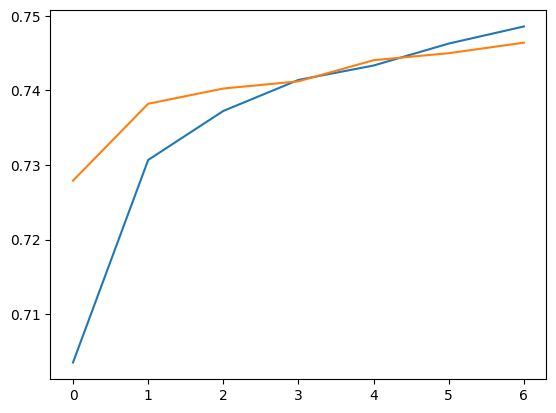

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Prediction

In [57]:
model.save("lstm_model.h5")

In [58]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# 🔥 Test Data:
#### After this I prepared the test data. I preprocessed the columns of the test data and prepared all the features that were in the training data. 

# 🔥 Prediction:
#### Then I predicted this data using the LSTM model whether it is a duplicate or not.

# 🔥 Score:
#### Score: 0.44732 (Log loss Score according Quora Question Pairs Copetition)